In [1]:
# imports
from os.path import abspath, join, dirname, normpath, basename
from os import makedirs, rename, rmdir
import requests, zipfile, io
import shutil
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

# Setup data
data_folder = join(dirname(abspath('')), 'data')
makedirs(data_folder, exist_ok=True)

#Read all data
data_2011 = pd.read_csv(join(data_folder,'2011 Stack Overflow Survey Results.csv'),encoding='windows-1252')
# country - What Country or Region do you live in?
# age - How old are you?
# Industry - How would you best describe the industry you work in?
# size of company - Which best describes the size of your company?
# occupation - Which of the following best describes your occupation?
# Fair amount of questions of knowledge of languages here!
# Operating system - What operating system do you use the most?
# StackOverflow usage - Which of our sites do you frequent most?

# how much they like the job - Please rate your job/career satisfaction
# money annually - Including bonus, what is your annual compensation in USD?
data_2012 = pd.read_csv(join(data_folder,'2012 Stack Overflow Survey Results.csv'))
# country - What Country or Region do you live in?
# age - How old are you?
# Industry - How would you best describe the industry you work in?
# size of company - Which best describes the size of your company?
# occupation - Which of the following best describes your occupation?
# Fair amount of questions of knowledge of languages here!
# Operating system - What desktop operating system do you use the most?
# StackOverflow usage - Which of our sites do you frequent most?
# IM ONTO SOMETHING INTERESTING
# how much they like their jobs - What best describes your career / job satisfaction?
# How much they earn annually - Including bonus, what is your annual compensation in USD?
data_2013 = pd.read_csv(join(data_folder,'2013 Stack Overflow Survey Responses.csv'))
# country - What Country or Region do you live in?
# age - How old are you?
# Industry - How would you best describe the industry you work in?
# size of company - How many people work for your company?
# occupation - Which of the following best describes your occupation?
# Fair amount of questions of knowledge of languages here!
# Also technologies excited about
# Operating system - What desktop operating system do you use the most?

# how much they like their jobs - What best describes your career / job satisfaction?
# How much they earn annually - Including bonus, what is your annual compensation in USD?

# a lot of columns with no names ffs
data_2014 = pd.read_csv(join(data_folder,'2014 Stack Overflow Survey Responses.csv'))
# country - What Country or Region do you live in?
# age - How old are you?
# GENDER  - What is your gender?
# occupation - Which of the following best describes your occupation?
# How much they earn annually - Including bonus, what is your annual compensation in USD?
# Industry - How would you best describe the industry you work in?
# Remote work - Do you work remotely?
# Remote work satisfaction - Do you enjoy working remotely?
# Fair amount of questions of knowledge of languages here!
# Also technologies excited about
# Operating system - What desktop operating system do you use the most?
#   - How do you use Stack Overflow?
data_2015 = pd.read_csv(join(data_folder,'2015 Stack Overflow Developer Survey Responses.csv'))
# NEED TO REMOVE FIRST ROW - bugged csv
# Country - Country
# Age - Age
# Gender - Gender
# Years of experience - Years IT / Programming Experience
# Occupation - Occupation
# OS - Desktop Operating System
# HUGE amount of questions of knowledge of languages here!
# HUGE technologies excited about
# Compensation - Compensation ( or Compensation: midpoint)
# Industry - Industry
# Job satisfaction - Job Satisfaction
# Remote work? - Remote Status
# a bunch of nameless columns
data_2016 = pd.read_csv(join(data_folder,'2016 Stack Overflow Survey Responses.csv'))
# Country - country
# age - age_range
# gender - gender
# occupation - occupation
# experience - experience_range
# salary - salary_range ( also salary_midpoint)
# used technologies - tech_do
# wanted - tech_want
# industry - industry
# company size - company_size_range
# remote? - remote
# job satisfaction - job_satisfaction
# why stack overflow - why_stack_overflow
data_2017 = pd.read_csv(join(data_folder,'survey_results_public2017.csv'))
#country - Country
# occupation - Professional
# remote? - HomeRemote
# company size - CompanySize
# used - HaveWorkedLanguage
# want - WantWorkLanguage
# also we have framework, database, platform, IDE
# agile etc - Methodology
# Random columns about SO, but dont know what they mean really
data_2018 = pd.read_csv(join(data_folder,'survey_results_public2018.csv'))
#Country - Country
# company size - CompanySize
# experience - YearsCoding & YearsCodingProf
# job satisfaction - JobSatisfaction
# career satisfaction - CareerSatisfaction
# salary - Salary ( also currency in Currency) - converted into ConvertedSalary
# used - LanguageWorkedWith
# want - LanguageDesireNextYear # also Database, Platform, Framework ,
# IDE
# OperatingSystem
# Visiting Stack Overflow - StackOverflowVisit
# has account - Stack OverflowHasAccount
# considering membershit - StackOverflowConsiderMember
# age - Age

data_2019 = pd.read_csv(join(data_folder,'survey_results_public2019.csv'))
# country - Country
# company size - OrgSize
# type of developer - DevType
# years coding - YearsCode and YearsCodePro
# job satisfaction - JobSat / CareerSat
# total payout - ConvertedComp
# remote work ? - WorkRemote
# used - LanguageWorkedWith
# want - LanguageDesireNextYear / Database / Platform / WebFrame / MiscTech
# system - OpSys
# SOVisitTo
# SOVisitFreq
# SOFindAnswer
# SOTimeSaved
# age - Age
# gender - Gender
data_2020 = pd.read_csv(join(data_folder,'survey_results_public2020.csv'))
# age - Age
# compensation total converted - ConvertedComp
# country - Country
# DatabaseWorkedWith / DatabaseDesireNextYear ALSO Language/ Platform/ MiscTech NEWCollabTools
# opsys - OpSys
# company size - OrgSize
# employment type - Employment
# gender - Gender
# satisfaction - JobSat\
# SOPartFreq
# SOComm
# SOAccount
# SOVisitFreq
# YearsCode
# YearsCodePro
data_2021 = pd.read_csv(join(data_folder,'survey_results_public2021.csv'))
# Country - Country
# YearsCode
# YearsCodePro
# company size -OrgSize
# LanguageHaveWorkedWith - LanguageWantToWorkWith / Database / Platform / Webframe / MiscTech / Tools
# OpSys
# SOVisitFreq
# SOPartFreq
# Age
# Gender
# ConvertedCompYearly
data_2022 = pd.read_csv(join(data_folder,'survey_results_public2022.csv'))
# remote? - RemoteWork
# YearsCode
# YearsCodePro
# size of company - OrgSize
# Country - Country
# LanguageHaveWorkedWith / LanguageWantToWorkWith ALSO Database/ Platform/ Webframe/ MiscTech/ Tools
# SOVisitFreq
# SOAccount
# SOPartFreq
# age - Age
# Gender - Gender
# ConvertedCompYearly



# Does money bring happiness in the tech industry?

C:\Users\Cloud\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3203: DtypeWarning: Columns (46,48,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Cloud\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3203: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Cloud\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3203: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dt

In [3]:
#Read satisfaction and annual income data
sat_2020, usd_2020 = data_2020['JobSat'], data_2020['ConvertedComp']
usd_2019, sat_2019 = data_2019['ConvertedComp'], data_2019['JobSat']
sat_2018, usd_2018 = data_2018['JobSatisfaction'], data_2018['ConvertedSalary']
sat_2016, usd_2016 = data_2016['job_satisfaction'], data_2016['salary_midpoint'] # in USD
sat_2015, usd_2015 = data_2015['Job Satisfaction'], data_2015['Compensation: midpoint'] # in USD
sat_2013, usd_2013 = data_2013['What best describes your career / job satisfaction?'], data_2013['Including bonus, what is your annual compensation in USD?']
sat_2012, usd_2012 = data_2012['What best describes your career / job satisfaction? '], data_2012['Including bonus, what is your annual compensation in USD?']
sat_2011, usd_2011 = data_2011['Please rate your job/career satisfaction'], data_2011['Including bonus, what is your annual compensation in USD?']

In [4]:
#Initialize new dataframes

def make_new_df(usd_series,sat_series):
    data = pd.DataFrame()
    data['usd'] = usd_series
    data['sat'] = sat_series
    return data

data_sat_2011 = make_new_df(usd_2011,sat_2011)

data_sat_2012 = make_new_df(usd_2012,sat_2011)

data_sat_2013 = make_new_df(usd_2013,sat_2013)

data_sat_2015 = make_new_df(usd_2015,sat_2015)

data_sat_2016 = make_new_df(usd_2016,sat_2016)

data_sat_2018 = make_new_df(usd_2018,sat_2018)

data_sat_2019 = make_new_df(usd_2019,sat_2019)

data_sat_2020 = make_new_df(usd_2020,sat_2020)

df_group = [data_sat_2011,data_sat_2012,data_sat_2013,data_sat_2015,data_sat_2016,data_sat_2018,data_sat_2019,data_sat_2020]

In [5]:

def plot_sat(df):
    sns.countplot(
    x='sat',
    data=df.sort_values('sat'),
)
    plt.show()



In [6]:
#Explore data
sns.set(rc={'figure.figsize':(16,8.27)})
#for df in df_group:
  #  plot_sat(df)

# To see if the annual income influences that, we need to remap the values of satisfaction to a 0-1 scale
# Where 1 means you love your job, and 0 meaning you hate it
for df in df_group:
    print(df.sat.value_counts())
    print("----------------------")



I enjoy going to work      1419
It pays the bills           585
So happy it hurts           327
I'm not happy in my job     159
FML                          63
Response                      1
Name: sat, dtype: int64
----------------------
I enjoy going to work      1419
It pays the bills           585
So happy it hurts           327
I'm not happy in my job     159
FML                          63
Response                      1
Name: sat, dtype: int64
----------------------
I enjoy going to work      3383
Love my job                1973
It's a paycheck            1163
I'm not happy in my job     527
I wish I had a job!         502
Hate my job                  80
Response                      1
Name: sat, dtype: int64
----------------------
I'm somewhat satisfied with my job                    6540
I love my job                                         5819
I'm neither satisfied nor dissatisfied with my job    1775
I'm somewhat dissatisfied with my job                 1565
I hate my job  

In [7]:
def apply_sat_mask(df,mask):
    df['sat'] = df['sat'].replace(mask)

In [8]:


#It can be observed that the datasets all have different categorical responses
#Values like 'Response' will be ignored, as it seems to be an error
#Values referencing to people not having a job will also be ignored, as we want to see how satisfied people with jobs are.
#Remapping the categorical values

# first and second
mask_1 = {
    'I enjoy going to work' : 0.75,
    'It pays the bills' : 0.5,
    'So happy it hurts' : 1,
    "I'm not happy in my job" : 0.25,
    'FML' : 0,
    'Response' : float('nan')

}
# third
mask_2 = {
    'I enjoy going to work' : 0.75,
    "It's a paycheck" : 0.5,
    'Love my job' : 1,
    "I'm not happy in my job" : 0.25,
    'Hate my job' : 0,
    'Response' : float('nan'),
    "I wish I had a job!" : float('nan')
}
# fourth
mask_3 = {
    "I'm somewhat satisfied with my job" : 0.75,
    "I love my job" : 1,
    "I'm somewhat dissatisfied with my job": 0.25,
    "I hate my job" : 0,
    "I'm neither satisfied nor dissatisfied with my job" : 0.5,
    "Other (please specify)" : float('nan')



}
# fifth
mask_4 = {
    "I'm somewhat satisfied with my job" : 0.75,
    "I love my job" : 1,
    "I'm somewhat dissatisfied with my job": 0.25,
    "I hate my job" : 0,
    "I'm neither satisfied nor dissatisfied" : 0.5,
    "I don't have a job" : float('nan'),
    "Other (please specify)" : float('nan')

}
#sixth
mask_5 = {
    "Moderately satisfied" : 0.84,
    "Extremely satisfied" : 1,
    'Slightly satisfied' : 0.67,
    'Neither satisfied nor dissatisfied' : 0.5,
    'Extremely dissatisfied' : 0,
    "Moderately dissatisfied" : 0.16,
    "Slightly dissatisfied" : 0.33
}
# 7 and 8
mask_6 = {
    "Slightly satisfied" : 0.75,
    "Very satisfied" : 1,
    "Neither satisfied nor dissatisfied" : 0.5,
    "Slightly dissatisfied" : 0.25,
    "Very dissatisfied" : 0
}

apply_sat_mask(df_group[0],mask_1)
apply_sat_mask(df_group[1],mask_1)
apply_sat_mask(df_group[2],mask_2)
apply_sat_mask(df_group[3],mask_3)
apply_sat_mask(df_group[4],mask_4)
apply_sat_mask(df_group[5],mask_5)
apply_sat_mask(df_group[6],mask_6)
apply_sat_mask(df_group[7],mask_6)


In [9]:
for df in df_group:
    print(df.sat.value_counts())
    print("----------------------")
 # values mapped correctly


0.75    1419
0.50     585
1.00     327
0.25     159
0.00      63
Name: sat, dtype: int64
----------------------
0.75    1419
0.50     585
1.00     327
0.25     159
0.00      63
Name: sat, dtype: int64
----------------------
0.75    3383
1.00    1973
0.50    1163
0.25     527
0.00      80
Name: sat, dtype: int64
----------------------
0.75    6540
1.00    5819
0.50    1775
0.25    1565
0.00     305
Name: sat, dtype: int64
----------------------
0.75    16413
1.00    13251
0.25     4512
0.50     4416
0.00      833
Name: sat, dtype: int64
----------------------
0.84    26005
1.00    12436
0.67    10012
0.33     7057
0.16     6318
0.50     4966
0.00     2482
Name: sat, dtype: int64
----------------------
0.75    24207
1.00    22452
0.25    10752
0.50     8720
0.00     4857
Name: sat, dtype: int64
----------------------
1.00    14611
0.75    13930
0.25     7124
0.50     5783
0.00     3746
Name: sat, dtype: int64
----------------------


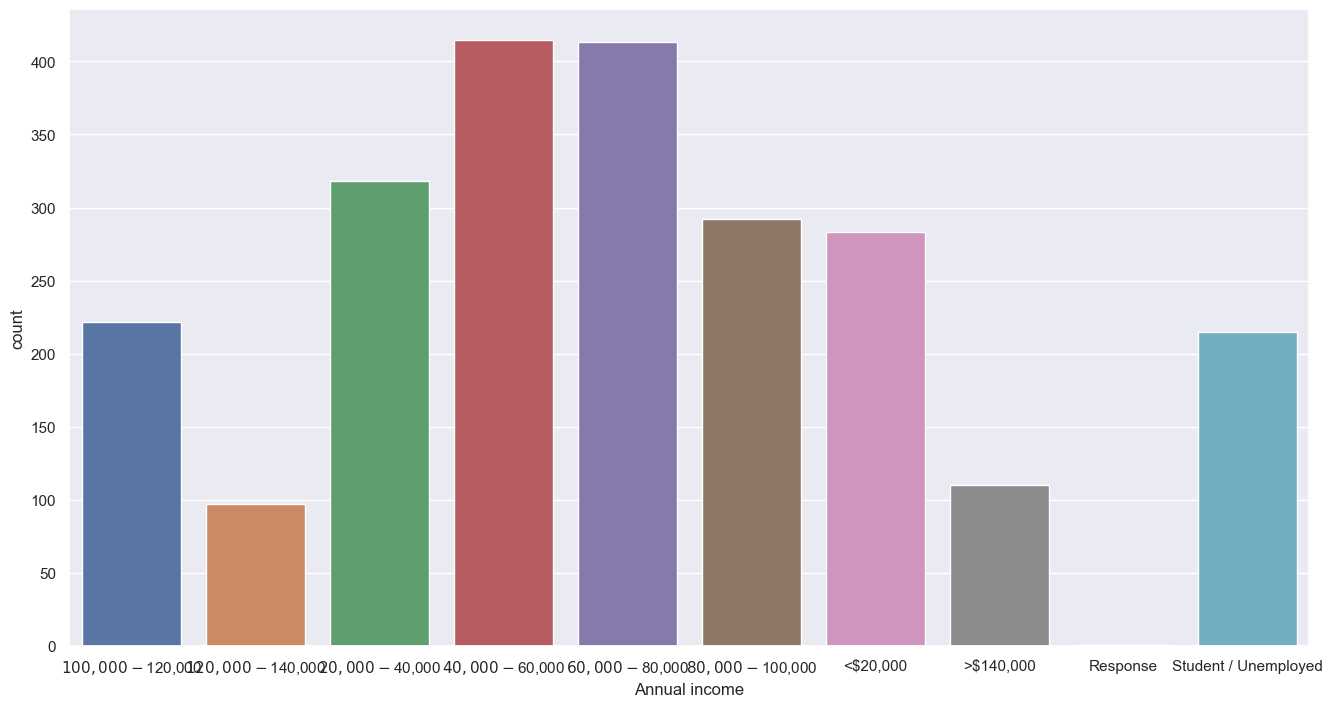

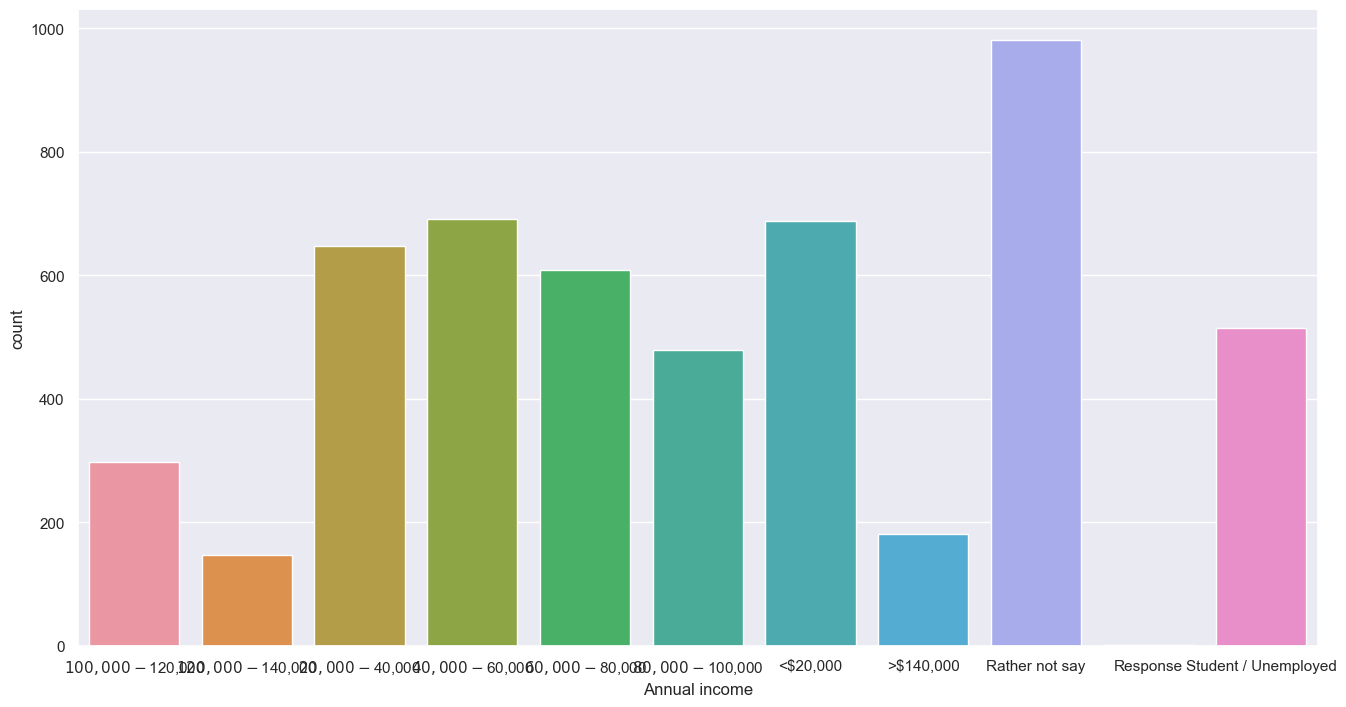

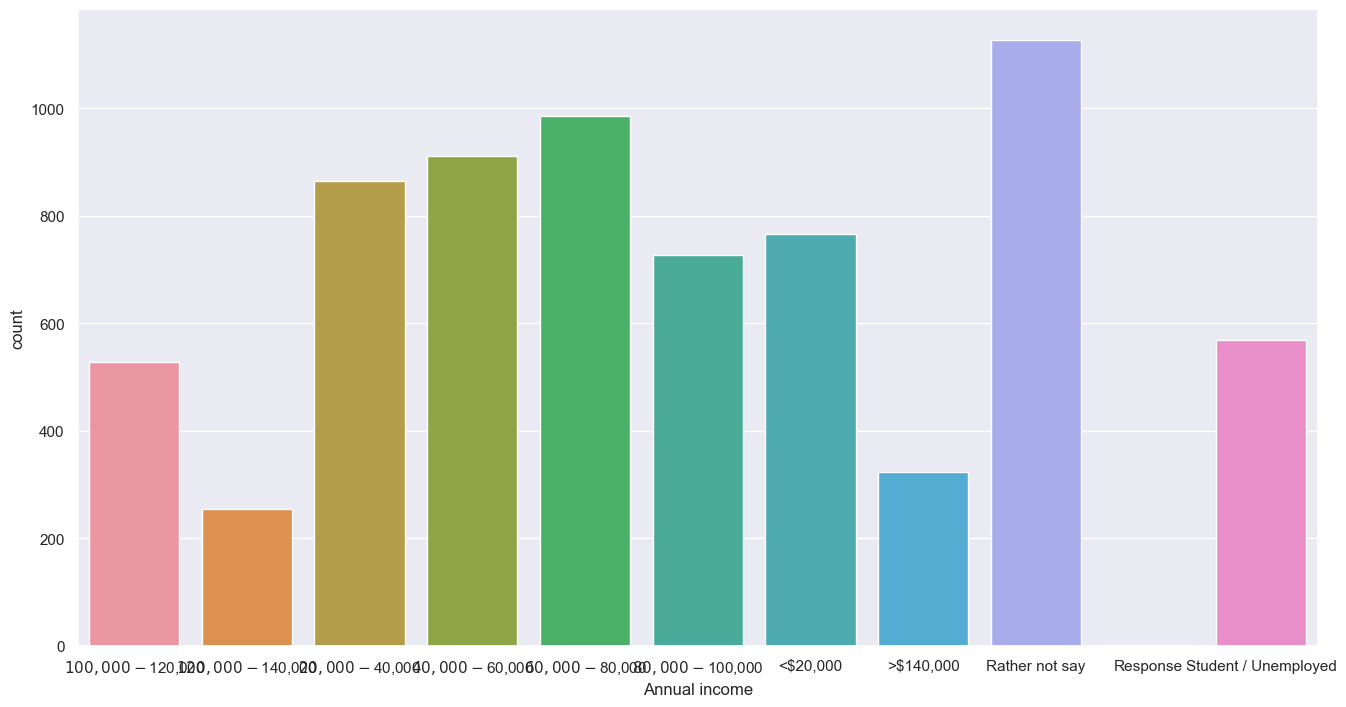

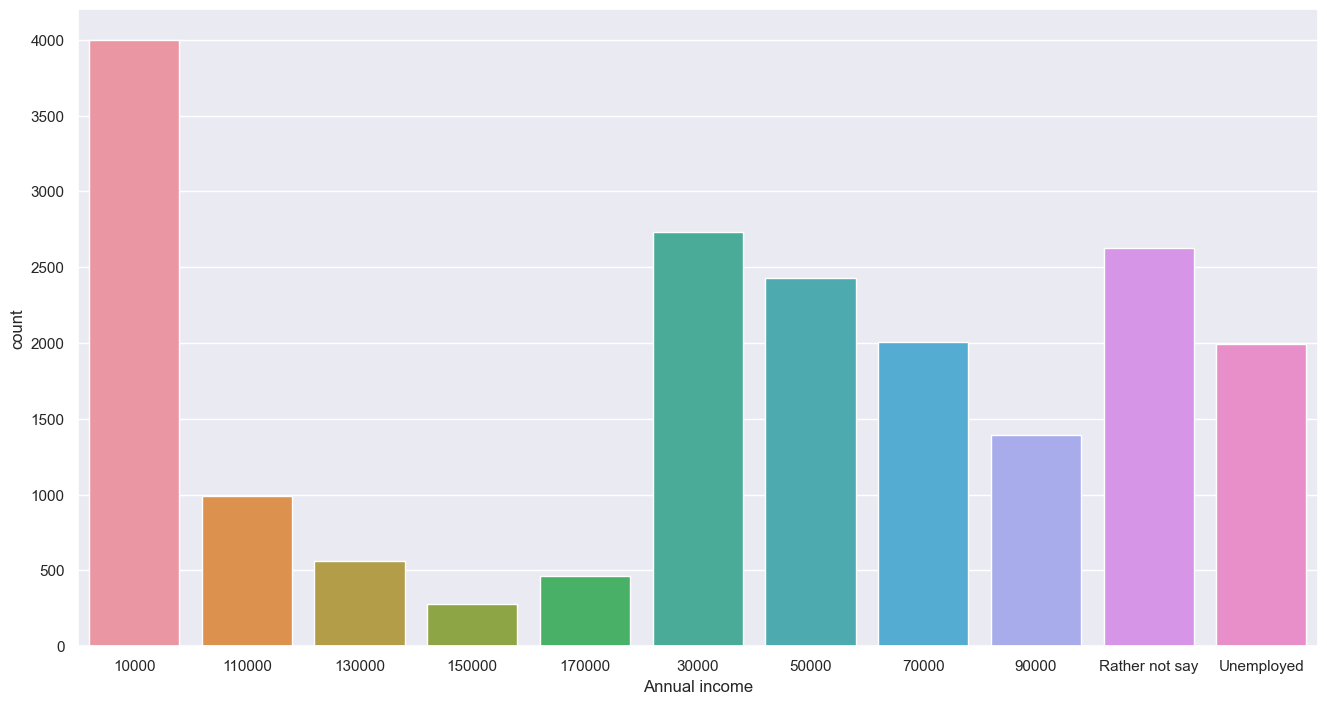

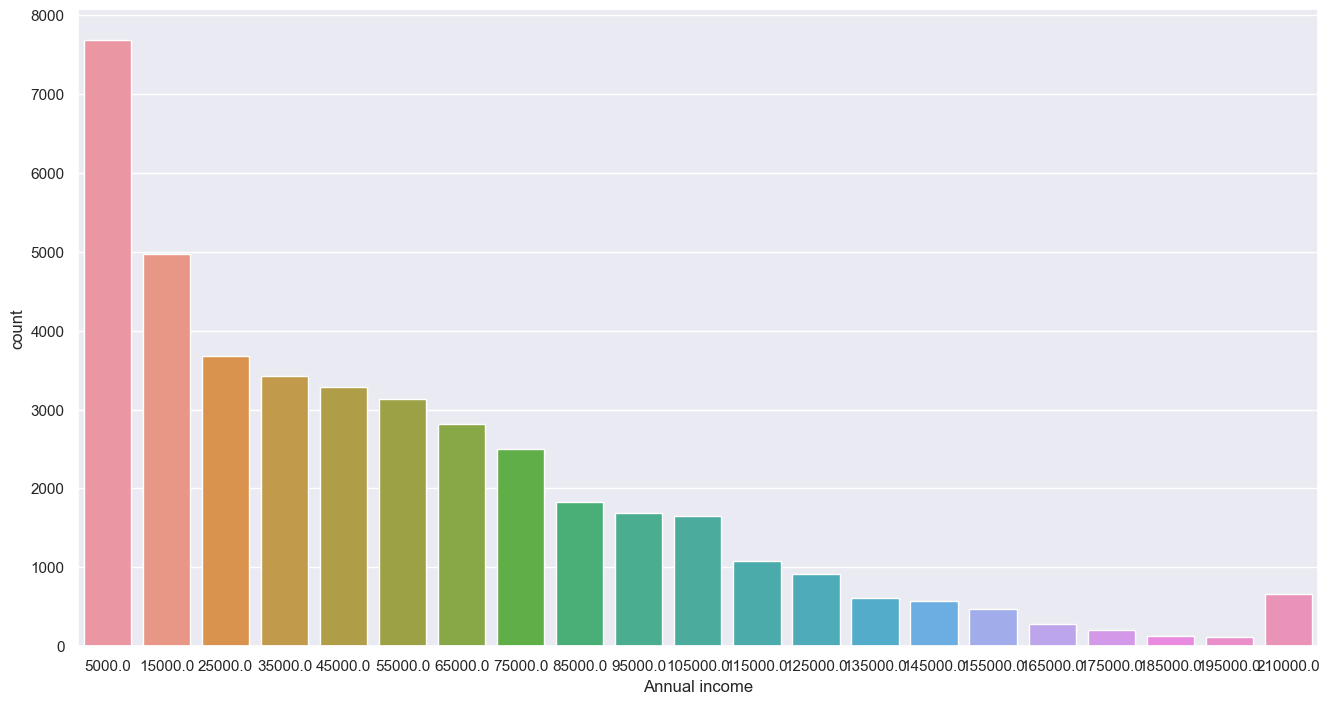

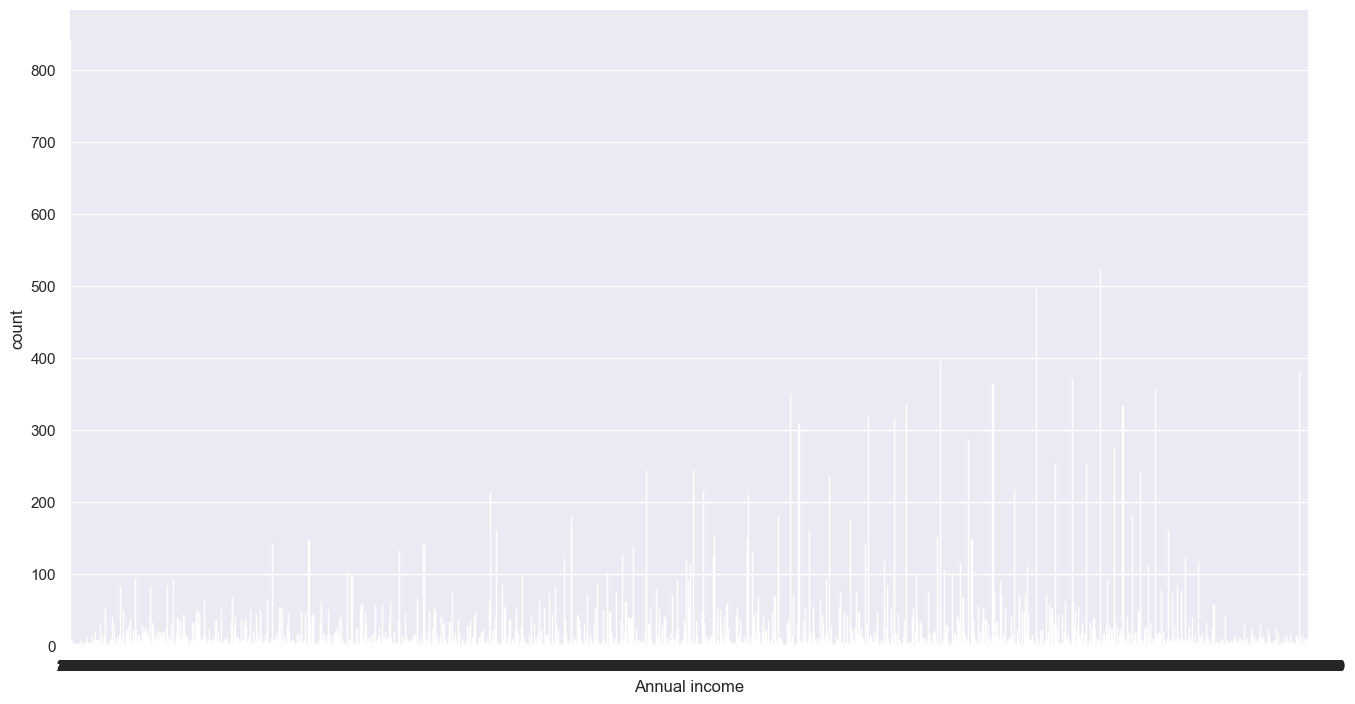

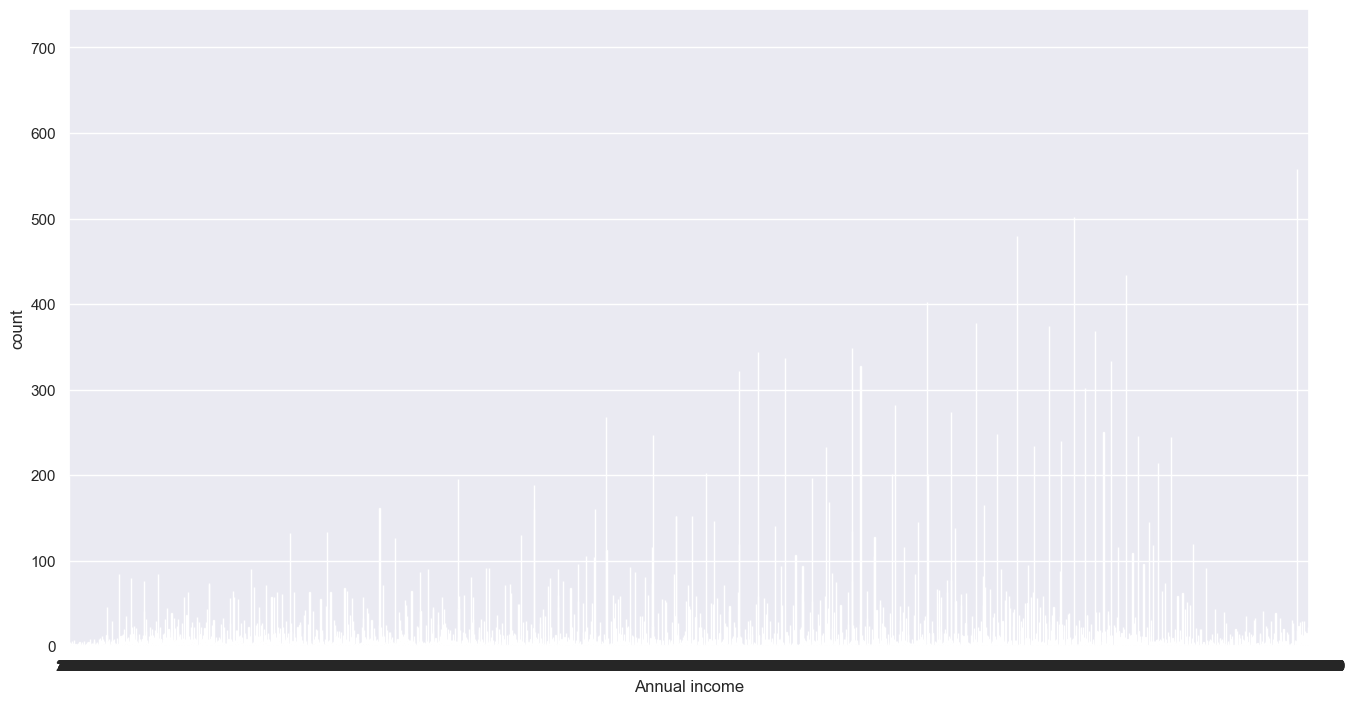

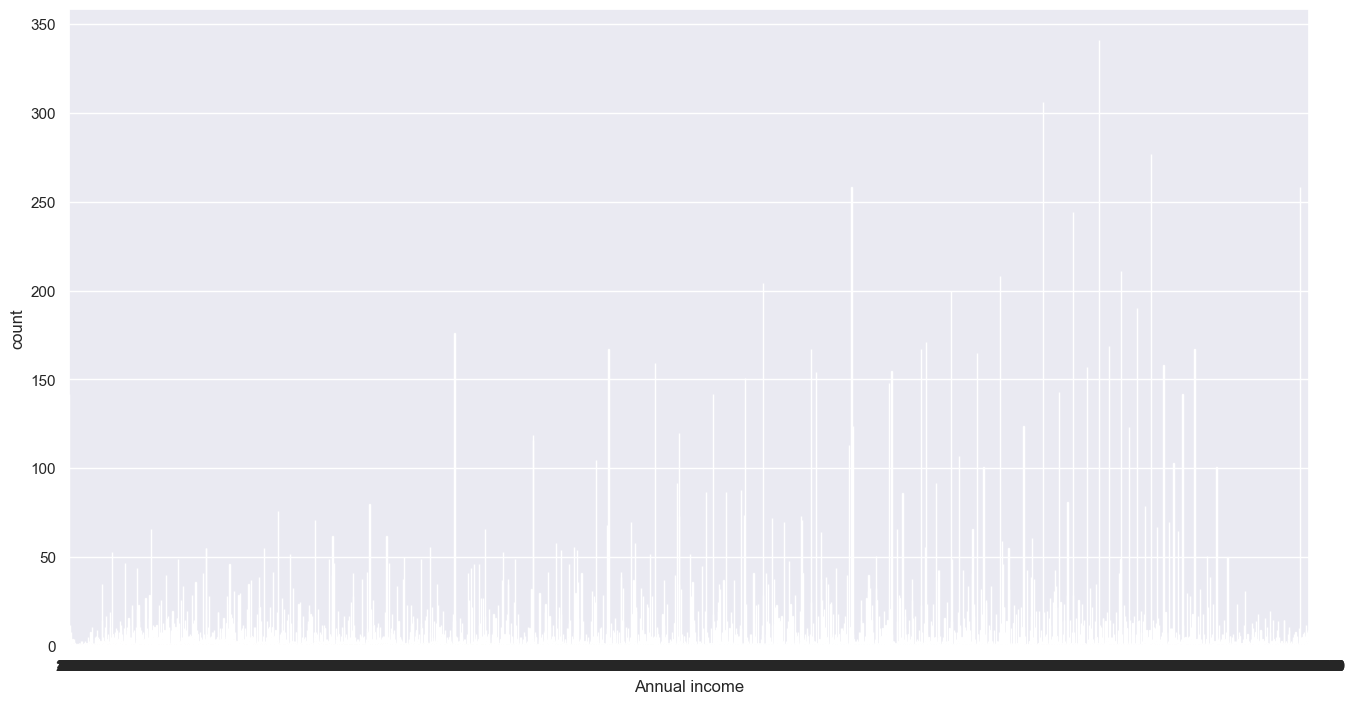

In [10]:
# Now lets look at the annual income data values
def plot_usd(df):
    sns.countplot(
    x='usd',
    data=df.sort_values('usd'),
).set(xlabel="Annual income")
    plt.show()
for df in df_group:
    plot_usd(df)

# Different values
# Last 3 have very differing values, but they are as an actual number instead of a range.
# The first 3 have values in ranges, which need to be translated into a medium point.
# This is the same way that it was done in their datasets to get the actual values for the 2 middle datasets


In [11]:
df_group[0].usd.value_counts()

$40,000 - $60,000       415
$60,000 - $80,000       413
$20,000 - $40,000       318
$80,000 - $100,000      292
<$20,000                283
$100,000 - $120,000     222
Student / Unemployed    215
>$140,000               110
$120,000 - $140,000      97
Response                  1
Name: usd, dtype: int64

In [12]:
usd_mask_0={
    "$40,000 - $60,000" : 50000,
    "$60,000 - $80,000" : 70000,
    "$20,000 - $40,000" : 30000,
    "$80,000 - $100,000" : 90000,
    "<$20,000" : 10000,
    "$100,000 - $120,000" : 110000,
    ">$140,000" : 150000,
    "$120,000 - $140,000" : 130000,
    "Student / Unemployed" : float('nan'),
    "Response" : float('nan')

}


In [13]:
df_group[1].usd.value_counts()

Rather not say          982
$40,000 - $60,000       691
<$20,000                688
$20,000 - $40,000       647
$60,000 - $80,000       609
Student / Unemployed    515
$80,000 - $100,000      479
$100,000 - $120,000     298
>$140,000               181
$120,000 - $140,000     147
Response                  1
Name: usd, dtype: int64

In [14]:
usd_mask_1 = usd_mask_0
usd_mask_1['Rather not say'] = float('nan')

In [15]:
df_group[2].usd.value_counts()

Rather not say          1128
$60,000 - $80,000        986
$40,000 - $60,000        911
$20,000 - $40,000        864
<$20,000                 767
$80,000 - $100,000       727
Student / Unemployed     570
$100,000 - $120,000      528
>$140,000                323
$120,000 - $140,000      254
Response                   1
Name: usd, dtype: int64

In [16]:
usd_mask_2 = usd_mask_1


In [17]:
df_group[3].usd.value_counts()

10000             4000
30000             2732
Rather not say    2628
50000             2429
70000             2007
Unemployed        1996
90000             1394
110000             991
130000             562
170000             462
150000             280
Name: usd, dtype: int64

In [18]:
usd_mask_3 = {
    "Rather not say" : float('nan'),
    "Unemployed" : float('nan')
}

In [19]:
# Now lets apply the mask!
def apply_usd_mask(df,mask):
    df['usd'] = df['usd'].replace(mask)

apply_usd_mask(df_group[0],usd_mask_0)
apply_usd_mask(df_group[1],usd_mask_1)
apply_usd_mask(df_group[2],usd_mask_2)
apply_usd_mask(df_group[3],usd_mask_3)



In [20]:
# Now most is dealt with, but we need to remap the incomes from the dataframes with a ton of data.
# For the code to work on that, we need to remove all of the NaN's from the dataframes
for df in df_group:
    df.dropna(inplace=True)
    b=2
print(df_group[-1].head())

         usd   sat
7   116000.0  0.25
9    32315.0  1.00
10   40070.0  0.25
11   14268.0  0.00
12   38916.0  1.00


In [21]:

 # THIS NEVER FUCKING FINISHED
def remap_incomes(df):
    # We will remap the values in the dataframes with a ton of different values, to a range which is present in the dataframe from 2016
     df.loc[df['usd'] <= 10000,df['usd']] = '5000'
     df.loc[10000 <df['usd'] <=20000,df['usd']] = '15000'
     df.loc[20000 <df['usd'] <=30000,df['usd']] = '25000'
     df.loc[30000 <df['usd'] <=40000,df['usd']] = '35000'
     df.loc[40000 <df['usd'] <=50000,df['usd']] = '45000'
     df.loc[50000 <df['usd'] <=60000,df['usd']] = '55000'
     df.loc[60000 <df['usd'] <=70000,df['usd']] = '65000'
     df.loc[70000 <df['usd'] <=80000,df['usd']] = '75000'
     df.loc[80000 <df['usd'] <=90000,df['usd']] = '85000'
     df.loc[90000 <df['usd'] <=100000,df['usd']] = '95000'
     print('halfway there')
     df.loc[100000 <df['usd'] <=110000,df['usd']] = '105000'
     df.loc[110000 <df['usd'] <=120000,df['usd']] = '115000'
     df.loc[120000 <df['usd'] <=130000,df['usd']] = '125000'
     df.loc[130000 <df['usd'] <=140000,df['usd']] = '135000'
     df.loc[140000 <df['usd'] <=150000,df['usd']] = '145000'
     df.loc[150000 <df['usd'] <=160000,df['usd']] = '155000'
     df.loc[160000 <df['usd'] <=170000,df['usd']] = '165000'
     df.loc[170000 <df['usd'] <=180000,df['usd']] = '175000'
     df.loc[180000 <df['usd'] <=190000,df['usd']] = '185000'
     df.loc[190000 <df['usd'],df['usd']] = '195000'

#remap_incomes(df_group[-1])
#print("did one")
#remap_incomes(df_group[-2])
#remap_incomes(df_group[-3])




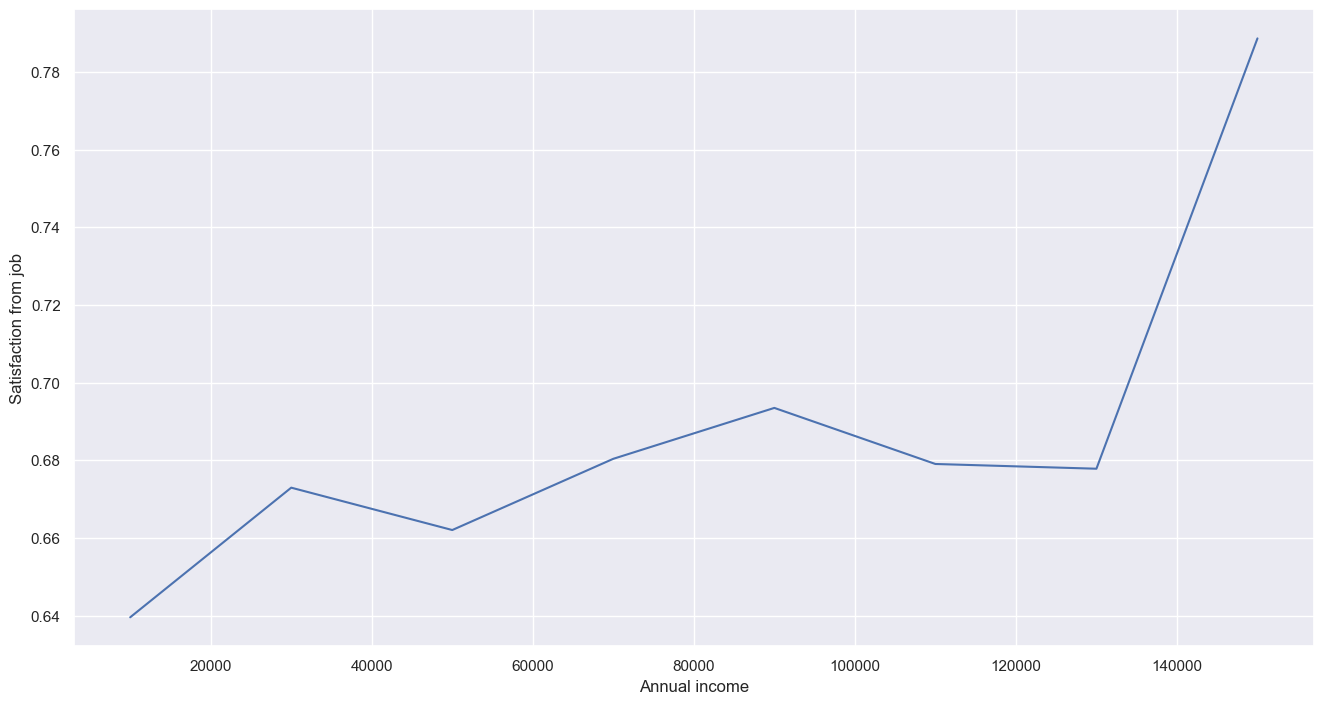

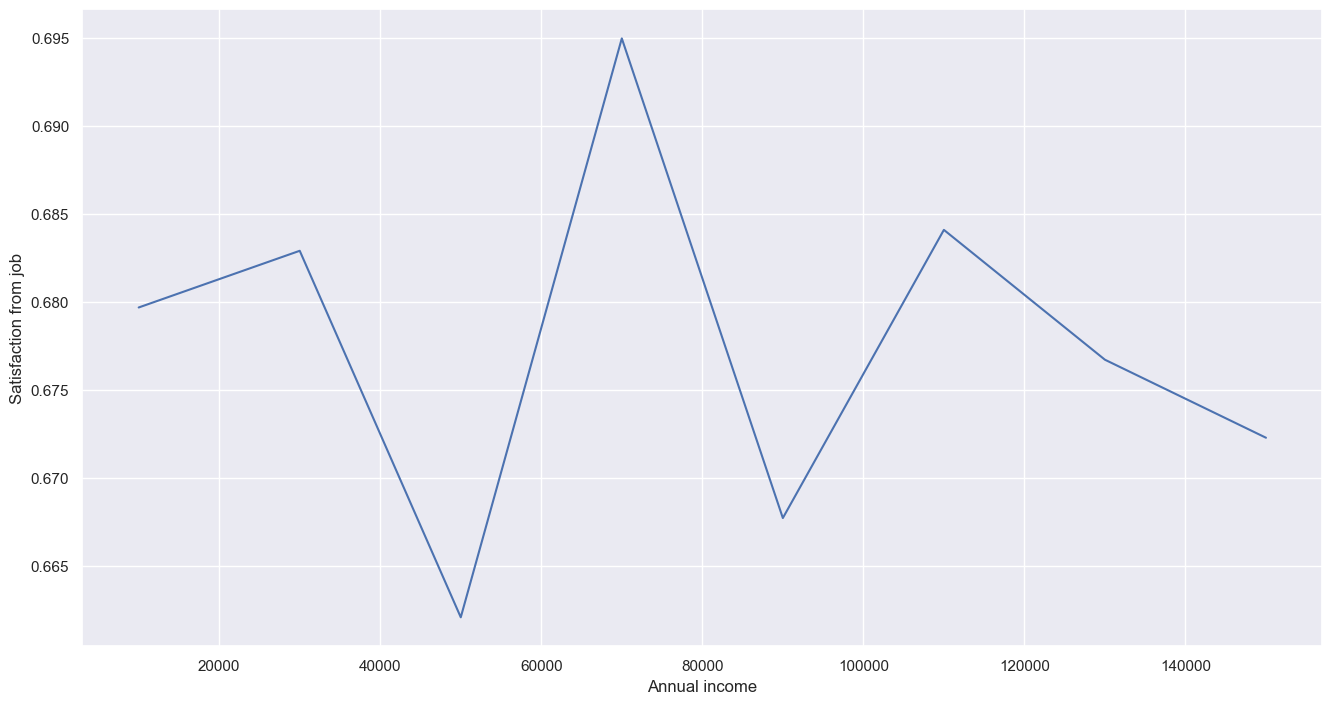

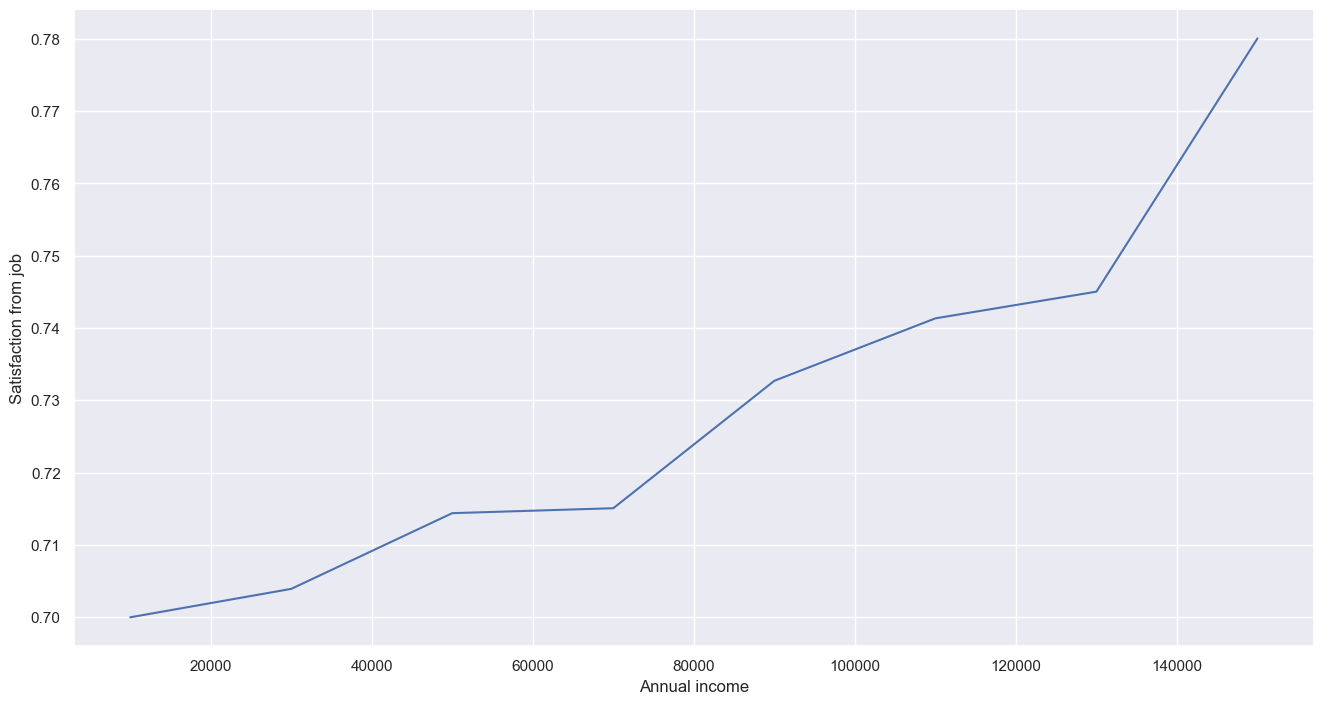

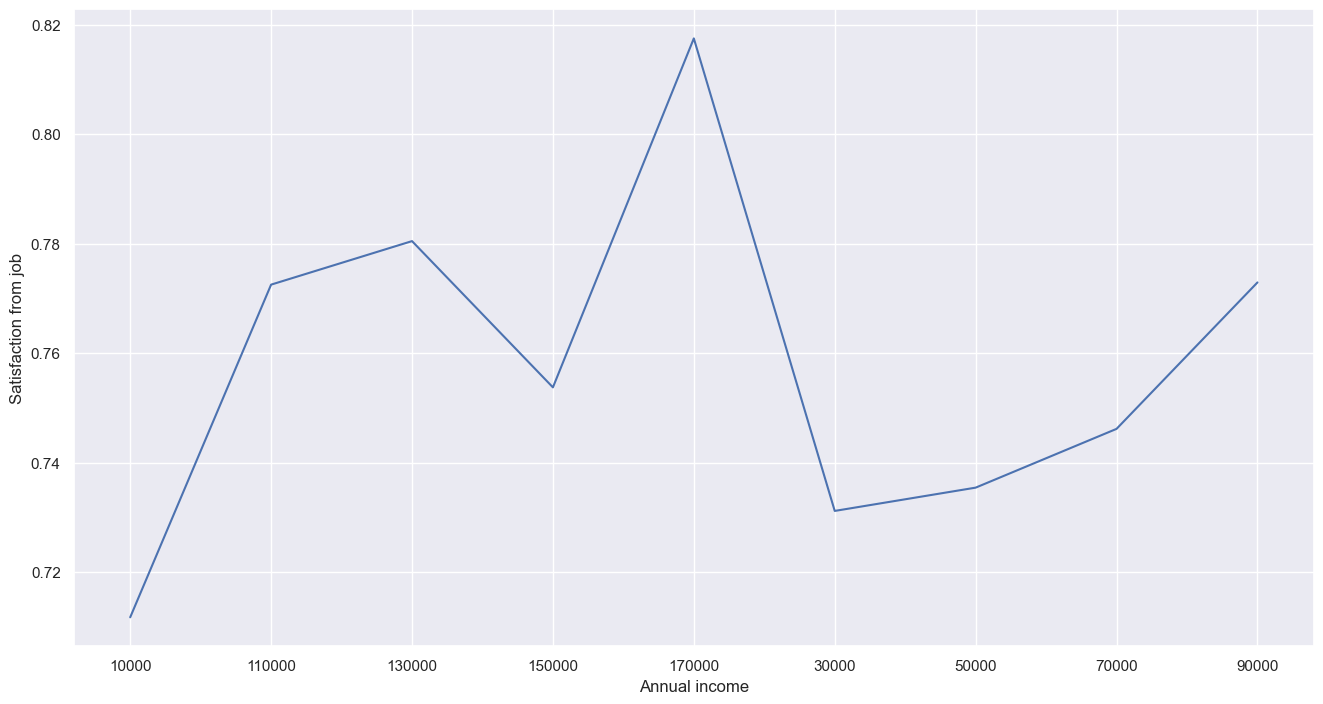

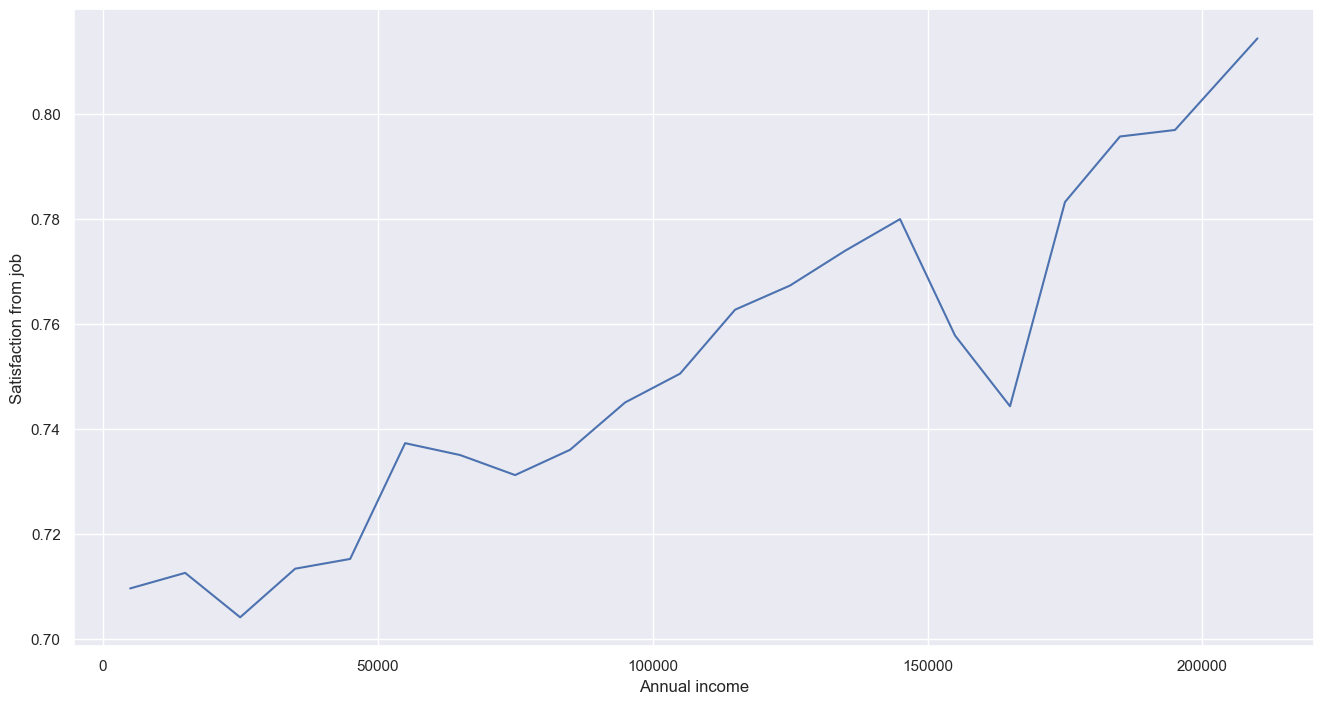

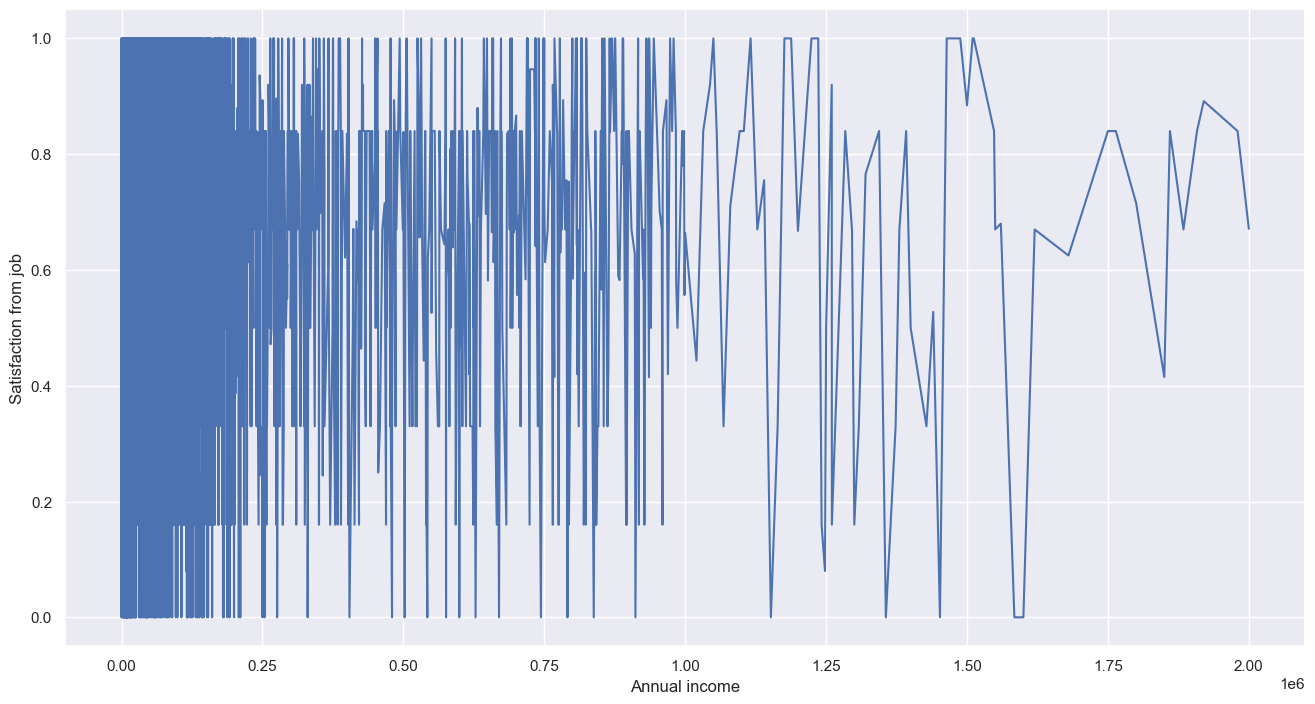

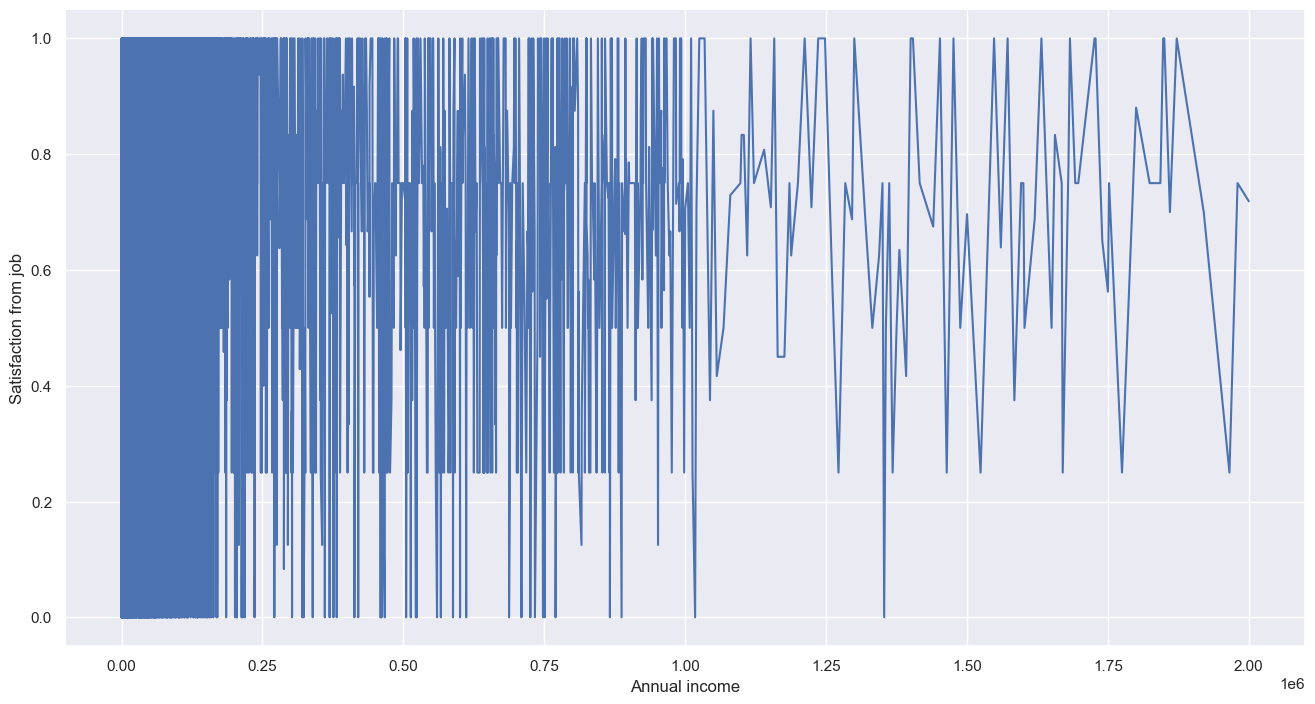

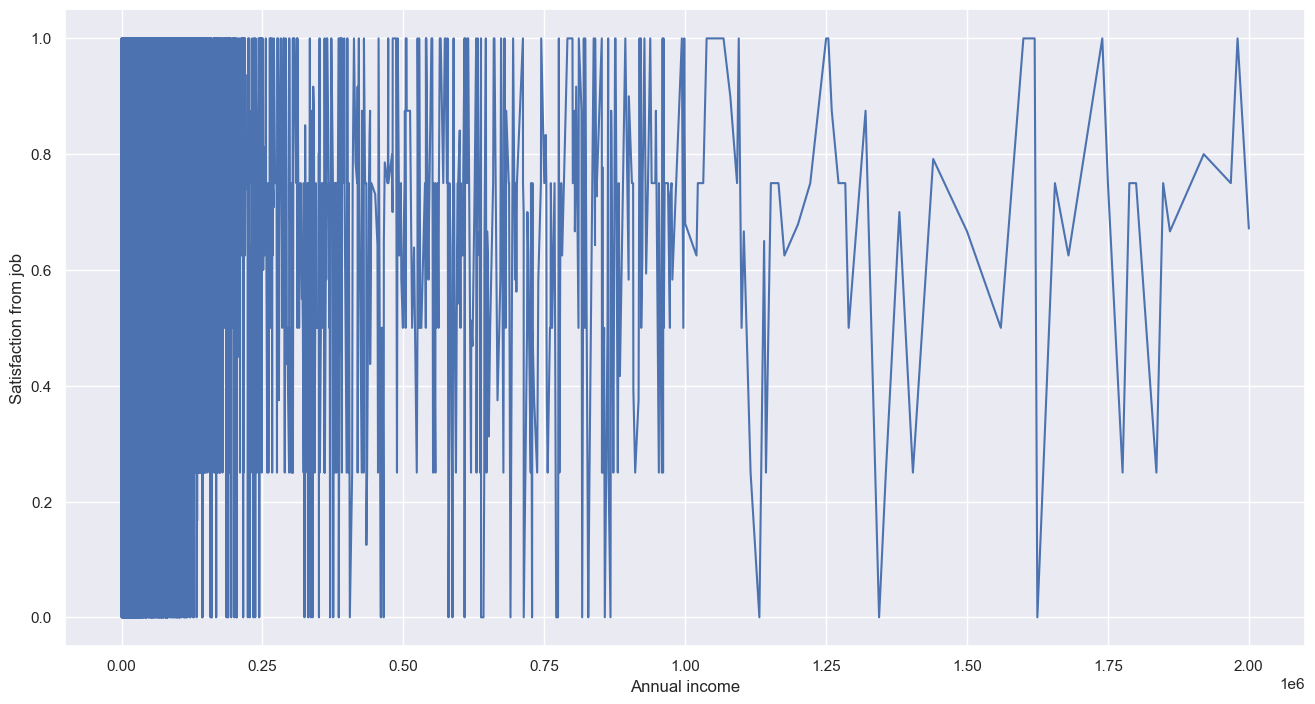

In [22]:
# Now lets get the mean satisfaction level per annual income
def plot_stuff(df):
    sns.lineplot(data=df,x='usd',y='sat').set(xlabel= "Annual income",ylabel = "Satisfaction from job")
    plt.show()
for df in df_group:
    grouped = df.groupby(['usd']).mean()
    plot_stuff(grouped)